In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [30]:
data = pd.read_csv('web_server_requests.csv', encoding='latin1')

In [31]:
df = pd.DataFrame(data)

In [32]:
df["ArrivalRate"].sum()

np.int64(1048691)

AttributeError: 'Line2D' object has no attribute 'get_height'

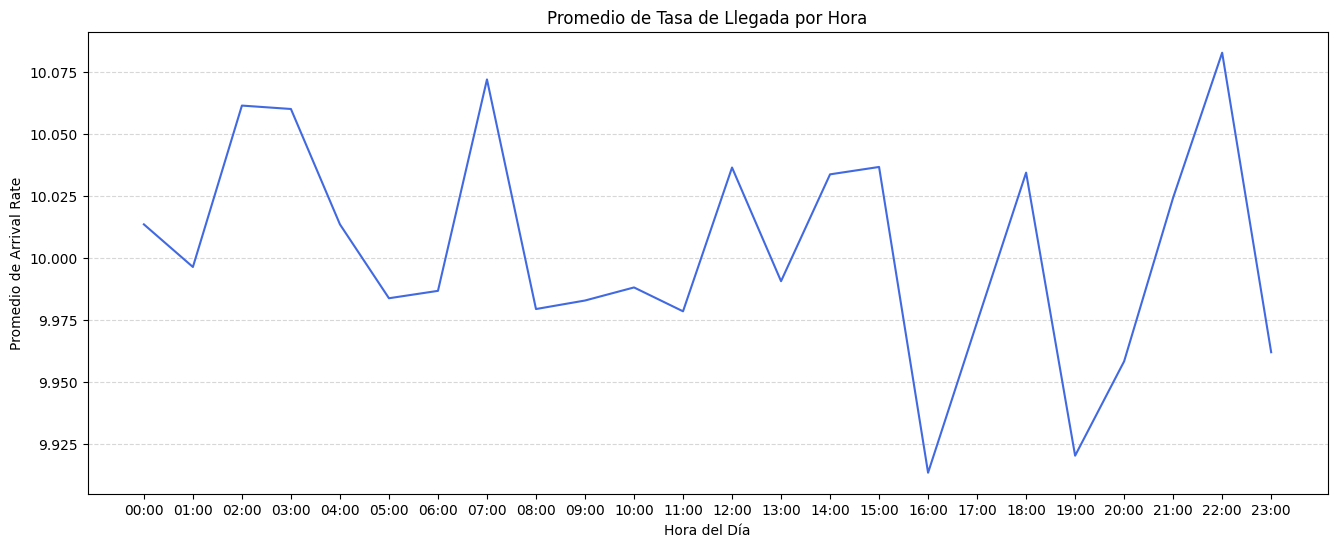

In [56]:
# Crear DataFrame y convertir timestamps
df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extraer la hora
df['Hour'] = df['Timestamp'].dt.hour

# Calcular el promedio de ArrivalRate por hora
df_hourly = df.groupby('Hour')['ArrivalRate'].mean().reset_index()

# Formatear la hora para el eje X
df_hourly['HourFormatted'] = df_hourly['Hour'].apply(lambda x: f"{x:02d}:00")

# Crear gráfico de barras
plt.figure(figsize=(16, 6))
bars = plt.plot(df_hourly['HourFormatted'], df_hourly['ArrivalRate'], color='royalblue')

# Etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Arrival Rate')
plt.title('Promedio de Tasa de Llegada por Hora')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas de cantidad sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f"{height:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

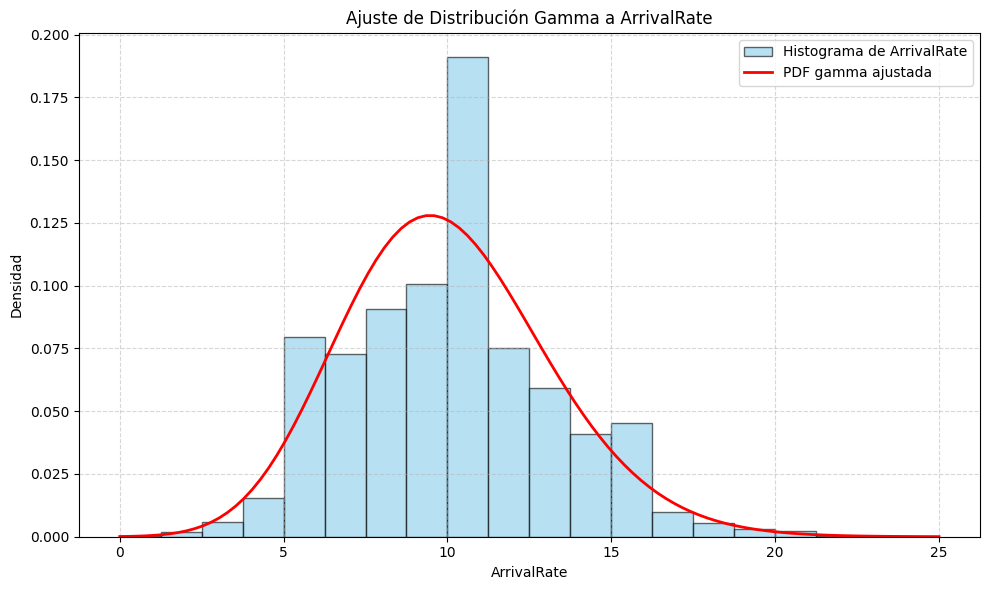

Parámetros ajustados:
  Shape (α): 34.7905
  Scale (θ): 0.5349


In [52]:
alpha, loc, theta = gamma.fit(df['ArrivalRate'])  # fijamos loc=0 porque arrival rate no tiene negativos

# Generar valores para la curva de la pdf
x = np.linspace(df['ArrivalRate'].min(), df['ArrivalRate'].max(), 100)
pdf = gamma.pdf(x, a=alpha, loc=loc, scale=theta)

# Graficar histograma y PDF
plt.figure(figsize=(10, 6))
plt.hist(df['ArrivalRate'], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histograma de ArrivalRate')
plt.plot(x, pdf, 'r-', lw=2, label='PDF gamma ajustada')

# Etiquetas
plt.title('Ajuste de Distribución Gamma a ArrivalRate')
plt.xlabel('ArrivalRate')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Mostrar parámetros ajustados
print(f"Parámetros ajustados:")
print(f"  Shape (α): {alpha:.4f}")
print(f"  Scale (θ): {theta:.4f}")

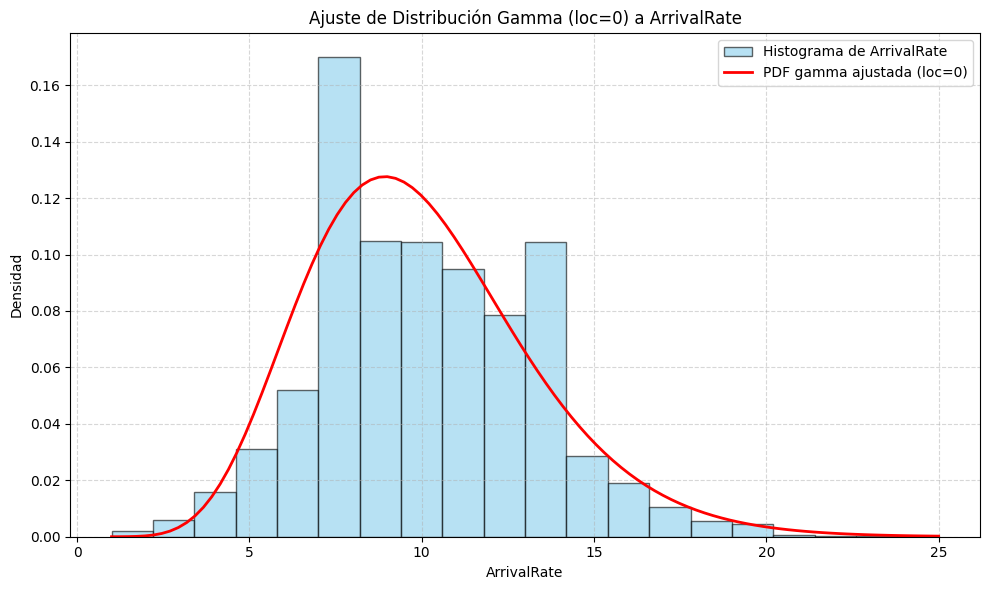

Parámetros ajustados:
  Shape (α): 9.3279
  Scale (θ): 1.0725


In [51]:
# Eliminar valores de ArrivalRate igual a 0
df_filtrado = df[df['ArrivalRate'] > 0].copy()

# Ajustar la distribución gamma con loc forzado a 0
alpha, loc, theta = gamma.fit(df_filtrado['ArrivalRate'], floc=0)

# Generar valores para la curva de la PDF
x = np.linspace(df_filtrado['ArrivalRate'].min(), df_filtrado['ArrivalRate'].max(), 100)
pdf = gamma.pdf(x, a=alpha, loc=loc, scale=theta)

# Graficar histograma y PDF
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['ArrivalRate'], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histograma de ArrivalRate')
plt.plot(x, pdf, 'r-', lw=2, label='PDF gamma ajustada (loc=0)')

# Etiquetas
plt.title('Ajuste de Distribución Gamma (loc=0) a ArrivalRate')
plt.xlabel('ArrivalRate')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Mostrar parámetros ajustados
print(f"Parámetros ajustados:")
print(f"  Shape (α): {alpha:.4f}")
print(f"  Scale (θ): {theta:.4f}")

In [37]:
# Calcular la probabilidad de que X > 8
prob_mayor_8 = 1 - gamma.cdf(8, a=alpha, loc=loc, scale=theta)

print(f"Probabilidad de recibir más de 8 solicitudes: {prob_mayor_8:.4f}")

Probabilidad de recibir más de 8 solicitudes: 0.7265


In [38]:
umbral_5min = 15 * 5  # Convertir 15 por minuto a 5 minutos => 75
prob_mayor_75 = 1 - gamma.cdf(umbral_5min, a=alpha, loc=loc, scale=theta)

print(f"Probabilidad de recibir más de 75 solicitudes en 5 minutos: {prob_mayor_75:.6f}")
print(f"En porcentaje: {prob_mayor_75 * 100:.4f}%")

Probabilidad de recibir más de 75 solicitudes en 5 minutos: 0.000000
En porcentaje: 0.0000%


In [39]:
# Valor umbral
umbral = 20

# Calcular la probabilidad
prob_supera_20 = gamma.sf(umbral, a=alpha, loc=loc, scale=theta)

# Mostrar como porcentaje
print(f"Probabilidad de superar 20 solicitudes: {prob_supera_20:.4%}")

Probabilidad de superar 20 solicitudes: 0.2670%
